In [1]:
%run ./pose_estimation.py

Using TensorFlow backend.


In [3]:
cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
cap.get(cv2.CAP_PROP_FRAME_WIDTH)

780.0

In [3]:
import sys
sys.path.append("/home/eg/Dropbox/bike_cam/bike_cam_py/local_modules")
from config_reader import config_reader


In [14]:
param, model_params = config_reader(config_file)

In [13]:


multiplier = [x * model_params['boxsize'] / cap.get(cv2.CAP_PROP_FRAME_HEIGHT) for x in param['scale_search']]
print(multiplier)

[0.5111111111111111, 1.0222222222222221, 1.5333333333333334, 2.0444444444444443]


In [15]:
list(param['scale_search'])

[0.5, 1.0, 1.5, 2.0]

In [4]:
ret, frame = cap.read()
cv2.imshow('frame',frame)

In [13]:
while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

True

In [14]:
ret, frame = cap.read()

In [7]:
video_file_name=r"/home/eg/Videos/vie_01_snip1.avi"
cap = cv2.VideoCapture(video_file_name)
cap.isOpened()

True

In [ ]:

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
param, model_params = config_reader()

multiplier = [x * model_params['boxsize'] / oriImg.shape[0] for x in param['scale_search']]

In [10]:
h5py.File

h5py._hl.files.File

In [9]:
config = model.get_config()

In [10]:
print(config)

{'name': 'model_1', 'input_layers': [['input_1', 0, 0]], 'layers': [{'inbound_nodes': [], 'class_name': 'InputLayer', 'config': {'sparse': False, 'dtype': 'float32', 'name': 'input_1', 'batch_input_shape': (None, None, None, 3)}, 'name': 'input_1'}, {'inbound_nodes': [[['input_1', 0, 0, {}]]], 'class_name': 'Conv2D', 'config': {'filters': 64, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'padding': 'same', 'kernel_size': (3, 3), 'activation': 'linear', 'kernel_constraint': None, 'name': 'conv1_1', 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'seed': None, 'distribution': 'uniform', 'mode': 'fan_avg'}}, 'use_bias': True, 'data_format': 'channels_last', 'bias_constraint': None, 'bias_regularizer': None, 'kernel_regularizer': None, 'trainable': True, 'activity_regularizer': None, 'strides': (1, 1), 'dilation_rate': (1, 1)}, 'name': 'conv1_1'}, {'inbound_nodes': [[['conv1_1', 0, 0, {}]]], 'class_name': 'Activation', 'config': {'trainable': T

In [11]:
 #model_params['boxsize'] / cap.get(cv2.CAP_PROP_FRAME_HEIGHT) for x in param['scale_search']]
config['scale_search']

KeyError: 'scale_search'

In [17]:
cap.get(cv2.CAP_PROP_POS_FRAMES)

0.0

In [2]:
classes = {'cyclist': 1}

In [3]:
print(classes)

{'cyclist': 1}


In [19]:
dir_pics = r'/mnt/427149F311EAC541/pipeline/'

In [20]:
str_out = ''
for k, v in classes.items():
    str_out = str_out + 'item { \n'
    str_out = str_out + '\t' + 'id: ' + str(v) + '\n'
    str_out = str_out + '\t' + 'name: ' + str(k) + '\n'
    str_out = str_out + '}\n'


In [21]:
print(str_out)

item { 
	id: 1
	name: cyclist
}



In [22]:
import os
with open(os.path.join(dir_pics,'label_map.pbtxt'), "w") as text_file:
    text_file.write(str_out)

In [24]:
'%(last)s, %(first)s %(last)s' % {'first': "James", 'last': "Bond"} + ' hi '

'Bond, James Bond hi '

In [27]:

PATH_TO_TF = '/home/eg/Dropbox/bike_cam/bike_cam_py/tf_models/models/research/object_detection/'
PATH_TO_MODEL_DIRECTORY = '/home/eg/Dropbox/bike_cam/bike_cam_py/transfer_learning/train_ssd/'

PATH_TO_TRAIN_DIR = os.path.join(PATH_TO_MODEL_DIRECTORY,'train')
PATH_TO_PIPELINE_CONFIG = os.path.join(PATH_TO_MODEL_DIRECTORY,'config_files/ssd_mobilenet_mod.config')
PATH_TO_EVAL_DIR = os.path.join(PATH_TO_MODEL_DIRECTORY,'eval')


d_param = {'PATH_TO_MODEL_DIRECTORY': PATH_TO_MODEL_DIRECTORY,
         'PATH_TO_TRAIN_DIR': PATH_TO_TRAIN_DIR,
         'PATH_TO_PIPELINE_CONFIG': PATH_TO_PIPELINE_CONFIG}


cmd_train = ('python ' + os.path.join(PATH_TO_TF,'train.py') + 
'--logtostderr --pipeline_config_path=%s'%PATH_TO_PIPELINE_CONFIG)
print(cmd_train)

python /home/eg/Dropbox/bike_cam/bike_cam_py/tf_models/models/research/object_detection/train.py--logtostderr --pipeline_config_path=/home/eg/Dropbox/bike_cam/bike_cam_py/transfer_learning/train_ssd/config_files/ssd_mobilenet_mod.config


In [36]:
import subprocess
proc = subprocess.Popen('ls',shell = True)
proc.wait()
print(proc.returncode)

0


In [6]:


import cv2
import numpy as np
import os
import sys
sys.path.append('../')
import tensorflow as tf
from tf_models.models.research.object_detection.utils import label_map_util
from tf_models.models.research.object_detection.utils import visualization_utils as vis_util

# load sample video
video_file_name=r"/mnt/427149F311EAC541/MEGA/bike_cam/data/test/vie_01_snip1.avi"
cap = cv2.VideoCapture(video_file_name)

ret, input = cap.read()
input = input[0:360,0:512]
#a-b
#| |
#c-d

a = np.array([215, 93], np.float32)
b = np.array([120, 98], np.float32)
c = np.array([460, 185], np.float32)
d = np.array([290, 210], np.float32)

pts = np.r_[a,b,c,d]
#pts = np.array([[460, 185], [290, 210], [120, 98], [215, 93]], np.float32)
#pts = np.array([[460, 185], [290, 210], [120, 98], [215, 93]], np.float32)
#pts = pts.reshape((-1, 1, 2))

pts = pts.reshape((4,2))

pts2 = np.r_[a+(0.5*(a-c)),b+(0.5*(b-d)),c,d]
pts2 = pts2.reshape((4,2))

#a-b
#| |
#c-d
a0=np.array([0,0], np.float32)
b0=np.array([0,512], np.float32)
c0=np.array([360,0], np.float32)
d0=np.array([360,512], np.float32)

pts_out1 = np.r_[a0,b0,c0,d0]
pts_out1 = pts_out1.reshape((4,2))

print(pts)
print(pts_out1)

M1 = cv2.getPerspectiveTransform(pts, pts_out1)

dst = cv2.warpPerspective(input,M1,(512,360))

pts = pts.reshape((-1, 1, 2)).astype(int)


[[ 215.   93.]
 [ 120.   98.]
 [ 460.  185.]
 [ 290.  210.]]
[[   0.    0.]
 [   0.  512.]
 [ 360.    0.]
 [ 360.  512.]]


In [7]:
pts

array([[[215,  93]],

       [[120,  98]],

       [[460, 185]],

       [[290, 210]]])

In [13]:
tuple(map(tuple, pts[1]))


((120, 98),)

In [16]:
tuple(pts[1][0])

(120, 98)

In [2]:
import pickle
vid_dict = {}
vid_dict['ber_01_snip'] = {'filename':'ber_01_snip.avi', 
                           'detection_zone' : [300,980,500,1260],
                          'tracking_zone' : [300,980,500,1260]}
vid_dict['tres_ciclistas'] = {'filename':'tres_ciclistas.mov', 
                           'detection_zone' : [282,1050,472,1240],
                          'tracking_zone' : [250,1050,450,1920],
                            'rectangle_image': [[574,574],[755,563],[1815,736],[1364,764]],#src
                             #'rectangle_tracking':[[0,0],[500,0],[500,1500],[0,1500]]
                              'rectangle_tracking':[[1000,500],[1500,500],[1500,2000],[1000,2000]],#dst,
                              'floor_proj_src': [[808,700],[1072,615],[671,550]],
                              'floor_proj_dst': [[808,925],[1072,735],[671,617]]
                             }
vid_dict['ciclista'] = {'filename':'ciclista.mov', 
                           'detection_zone' : [300,980,500,1260],
                          'tracking_zone' : [300,980,500,1260]}
#pickle.dump( vid_dict, open( "/mnt/427149F311EAC541/MEGA/bike_cam/data/test/video_meta.p", "wb" ) )
pickle.dump( vid_dict, open( "/home/eg/MEGAsync/bike_cam/data/test/video_meta.p", "wb" ) )

In [7]:
import cv2
import numpy as np
import os
import sys
sys.path.append('../')
#import tensorflow as tf

#from tf_models.models.research.object_detection.utils import label_map_util
#from tf_models.models.research.object_detection.utils import visualization_utils as vis_util
src =  np.array(vid_dict['tres_ciclistas']['floor_proj_src'], dtype=np.float32)
dst =  np.array(vid_dict['tres_ciclistas']['floor_proj_dst'], dtype=np.float32)

all_blobs = pickle.load(open( "/home/eg/MEGAsync/bike_cam/data/test/blobs.p", "rb" ) )
P = cv2.getAffineTransform(src,dst)
cv2.transform()
cv2.transform(all_blobs_whole.astype(np.float64).reshape(1,-1,2),vh.M)

In [8]:
P

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -4.52727095e-02,   2.09468241e+00,  -5.04697336e+02]])

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
from cycl_detection import tf_detector
from local_modules import video_handler
plt.rcParams['figure.figsize'] = (10.0, 10.0)
np.set_printoptions(precision=3, suppress=True)

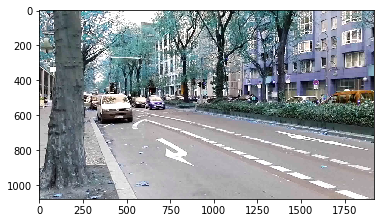

[[  574.   574.]
 [  755.   563.]
 [ 1815.   736.]
 [ 1364.   764.]]
[[   0.    0.]
 [  50.    0.]
 [  50.  150.]
 [   0.  150.]]


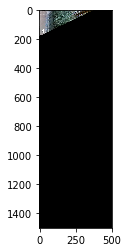

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
vid_dict = {'filename':'tres_ciclistas.mov', 
                           'detection_zone' : [282,1050,472,1240],
                          'tracking_zone' : [250,1050,450,1920],
                             'rectangle_image': [[574,574],[755,563],[1815,736],[1364,764]],
                             'rectangle_tracking':[[0,0],[50,0],[50,150],[0,150]]
                             # 'rectangle_image': [(574,574),(755,563),(1815,736),(1364,764)],
                             #'rectangle_tracking':[(0,0),(500,0),(666,666),(666,0)]
                             }
image = cv2.imread('/home/eg/Documents/tres1f.png')
plt.imshow(image)
plt.show()
src = np.array(vid_dict['rectangle_image'], dtype=np.float32)
dst = np.array(vid_dict['rectangle_tracking'], dtype=np.float32)
print(src)
print(dst)
M = cv2.getPerspectiveTransform(src, dst)
image = cv2.warpPerspective(image, M,(500,1500))
plt.imshow(image)
plt.show()
#print(image)

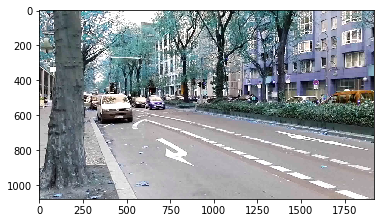

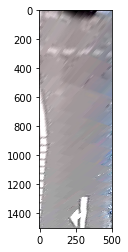

In [12]:
PATH_TO_PROCESS_DIR = r'/mnt/427149F311EAC541/MEGA/bike_cam/tf_learning_data/'
PATH_TO_CKPT = os.path.join(PATH_TO_PROCESS_DIR, 'ssdv1/frozen_inference_graph.pb')
PATH_TO_LABELS = r"/mnt/427149F311EAC541/pipeline/label_map.pbtxt"

#tfd = tf_detector.TFDetector(PATH_TO_CKPT,PATH_TO_LABELS,1)
vh = video_handler.VideoHandler('tres_ciclistas')
ret, frame = vh.get_next()
plt.imshow(frame)
plt.show()
#frame = vh.get_current_tracking_zone()
image = cv2.warpPerspective(frame, vh.M,(500,1500))
plt.imshow(image)
plt.show()

In [30]:
p = np.matmul(vh.M,np.array([  1815,736.,1]))
print(p)
p[1]/p[0]
t=1500/p[1]
print(t)
print(t*p)
np.append(src[2],np.array([1]))

[ -436.867 -1310.601    -0.874]
-1.14451346062
[  500.  1500.     1.]


array([ 1815.,   736.,     1.])

In [10]:
np.matmul(vh.M,np.array([  574.,   574.,1]))

array([ -6.82121026e-13,  -4.54747351e-13,  -3.49483752e-01])

In [28]:
np.argmax(np.sum(vh.dst,axis = 1))

2

[[[ 574  574]]

 [[ 755  563]]

 [[1815  736]]

 [[1364  764]]]


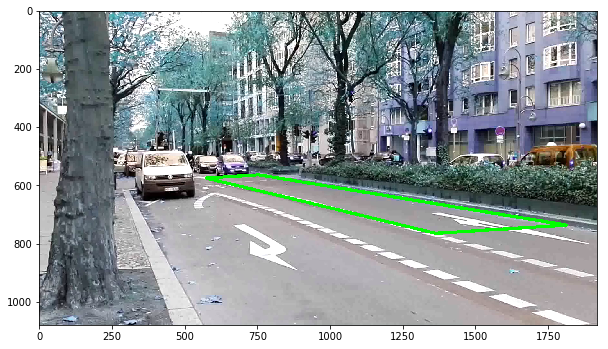

In [56]:
PATH_TO_PROCESS_DIR = r'/mnt/427149F311EAC541/MEGA/bike_cam/tf_learning_data/'
PATH_TO_CKPT = os.path.join(PATH_TO_PROCESS_DIR, 'ssdv1/frozen_inference_graph.pb')
PATH_TO_LABELS = r"/mnt/427149F311EAC541/pipeline/label_map.pbtxt"

#tfd = tf_detector.TFDetector(PATH_TO_CKPT,PATH_TO_LABELS,1)
vh = video_handler.VideoHandler('tres_ciclistas')
ret, frame = vh.get_next()

#vh.get_current_tracking_zone()
#image = cv2.warpPerspective(frame, vh.M,(frame.shape[1],frame.shape[0]))

#image = cv2.warpPerspective(frame, vh.M,(600,1000))
pts = np.array(vh.video_meta['rectangle_image'],dtype=np.int16)
pts = pts.reshape((-1, 1, 2)).astype(int)
print(pts)
image = cv2.polylines(frame, [pts], True, (0, 255, 0),thickness= 10)

plt.imshow(image)
plt.show()

In [11]:
for k in vh.video_meta[rectangle_image]
    frame = 

(800, 1470)

In [36]:
cv2.resize(image,dsize=image.shape//2)

TypeError: unsupported operand type(s) for //: 'tuple' and 'int'

In [31]:
np.array([[self.video_meta['tracking_zone'][2],self.video_meta['tracking_zone'][0],1.],
        [self.video_meta['tracking_zone'][2],self.video_meta['tracking_zone'][1],1.],
          [self.video_meta['tracking_zone'][3],self.video_meta['tracking_zone'][0],1.],
          [self.video_meta['tracking_zone'][3],self.video_meta['tracking_zone'][1],1.],
          ])

NameError: name 'self' is not defined

In [3]:
print(all_blobs.shape)
all_blobs_xy = vh.project_detection_to_xy_plane(all_blobs)
print(all_blobs_xy.shape)

(221, 2)


NameError: name 'vh' is not defined

In [7]:
import pickle
all_blobs = pickle.load(open( "/mnt/427149F311EAC541/MEGA/bike_cam/data/test/blobs.p", "rb" ) )
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
from cycl_detection import tf_detector
from local_modules import video_handler

In [8]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [9]:
#tfd = tf_detector.TFDetector(PATH_TO_CKPT,PATH_TO_LABELS,1)
vh = video_handler.VideoHandler('tres_ciclistas')
ret, whole_frame = vh.get_next()
tracking_frame = vh.get_current_tracking_zone().copy()
detection_frame = vh.get_current_detection_zone().copy()

all_blobs_tracking = vh.mv_detection_to_tracking(all_blobs)
#all_blobs_tracking = all_blobs
all_blobs_whole = vh.mv_detection_to_input(all_blobs)
all_blobs_xy = vh.project_detection_to_xy_plane(all_blobs)


#we test all visulaizations by moving the blobs to all the sub screens
for k in range(all_blobs.shape[0]):
    detection_frame = cv2.circle(detection_frame, tuple(all_blobs[k].astype(int)), 5, (0,0,255), -1)
    tracking_frame = cv2.circle(tracking_frame, tuple(all_blobs_tracking[k].astype(int)), 5, (0,0,255), -1)
    whole_frame = cv2.circle(whole_frame, tuple(all_blobs_whole[k].astype(int)), 5, (0,0,255), -1)
    


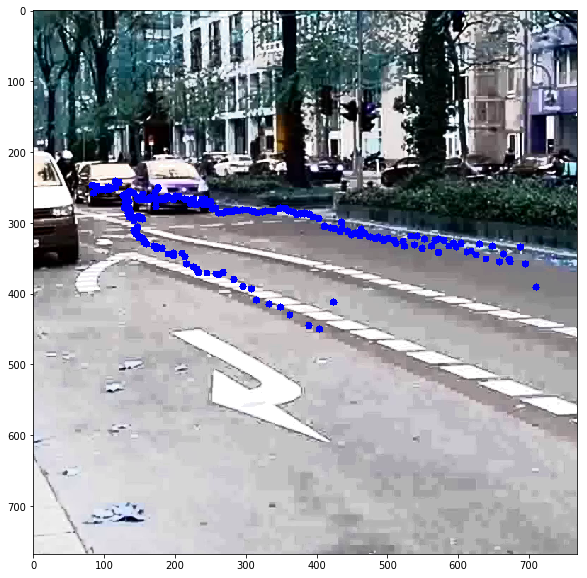

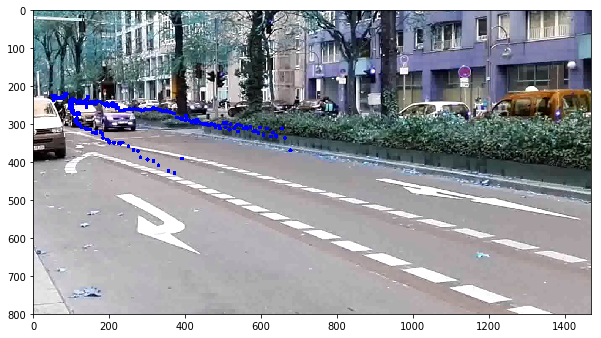

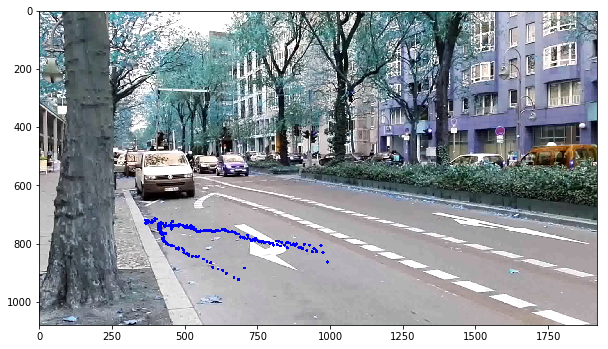

In [10]:
plt.imshow(detection_frame)
plt.show()

plt.imshow(tracking_frame)
plt.show()

plt.imshow(whole_frame)
plt.show()

In [5]:
vh.mv_detection_to_tracking(all_blobs).shape

(221, 2)

In [5]:
vh.mv_detection_to_input(all_blobs).shape

(221, 2)